In [ ]:
import pandas as pd
news_data = pd.read_csv('../yfinance_data/raw_analyst_ratings.csv')  # Update with your file path

In [8]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity 
news_data['Sentiment'] = news_data['headline'].apply(get_sentiment)
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')

In [10]:
# Load historical stock data
stock_data = {}
for ticker in ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 'NVDA', 'TSLA']:
    stock_data[ticker] = pd.read_csv(f'../yfinance_data/{ticker}_historical_data.csv')
    stock_data[ticker]['Date'] = pd.to_datetime(stock_data[ticker]['Date'])

In [ ]:
def merge_data(stock_df, news_df):
    stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
    if stock_df['Date'].isnull().any():
        print("NaT values found in stock_df 'Date' column.")
    if news_df['date'].isnull().any():
        print("NaT values found in news_df 'date' column.")

    # Merge the dataframes
    return pd.merge(stock_df, news_df, left_on='Date', right_on='date', how='left')

In [15]:
def merge_data(stock_df, news_df):
    stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
    if news_df['date'].dt.tz is not None:
        news_df['date'] = news_df['date'].dt.tz_convert(None)  
    if stock_df['Date'].dt.tz is not None:
        stock_df['Date'] = stock_df['Date'].dt.tz_convert(None)  
    if stock_df['Date'].isnull().any():
        print("NaT values found in stock_df 'Date' column.")
    if news_df['date'].isnull().any():
        print("NaT values found in news_df 'date' column.")

    # Merge the dataframes
    return pd.merge(stock_df, news_df, left_on='Date', right_on='date', how='left')

In [20]:
for ticker, df in stock_data.items():
    df['Price_Change'] = df['Close'].pct_change()
    if 'Sentiment' not in df.columns:
        print(f"'Sentiment' column not found for {ticker}. Checking news_data.")
        df = merge_data(df, news_data)
        if 'Sentiment' not in df.columns:
            print(f"'Sentiment' column still not found for {ticker}.")
            continue  

    correlation = df['Sentiment'].corr(df['Price_Change'])
    print(f'Correlation between sentiment and price change for {ticker}: {correlation}')

'Sentiment' column not found for AAPL. Checking news_data.
NaT values found in news_df 'date' column.
Correlation between sentiment and price change for AAPL: nan
'Sentiment' column not found for MSFT. Checking news_data.
NaT values found in news_df 'date' column.
Correlation between sentiment and price change for MSFT: nan
'Sentiment' column not found for AMZN. Checking news_data.
NaT values found in news_df 'date' column.
Correlation between sentiment and price change for AMZN: nan
'Sentiment' column not found for GOOG. Checking news_data.
NaT values found in news_df 'date' column.
Correlation between sentiment and price change for GOOG: nan
'Sentiment' column not found for META. Checking news_data.


/home/g/10/Week1/Predicting-Price-Moves-with-Sentiment/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/g/10/Week1/Predicting-Price-Moves-with-Sentiment/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/g/10/Week1/Predicting-Price-Moves-with-Sentiment/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/g/10/Week1/Predicting-Price-Moves-with-Sentiment/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/g/10/Week1/Predicting-Price-Moves-with-Sentiment/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarni

NaT values found in news_df 'date' column.
Correlation between sentiment and price change for META: nan
'Sentiment' column not found for NVDA. Checking news_data.
NaT values found in news_df 'date' column.
Correlation between sentiment and price change for NVDA: nan
'Sentiment' column not found for TSLA. Checking news_data.
NaT values found in news_df 'date' column.
Correlation between sentiment and price change for TSLA: nan


/home/g/10/Week1/Predicting-Price-Moves-with-Sentiment/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/g/10/Week1/Predicting-Price-Moves-with-Sentiment/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/g/10/Week1/Predicting-Price-Moves-with-Sentiment/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


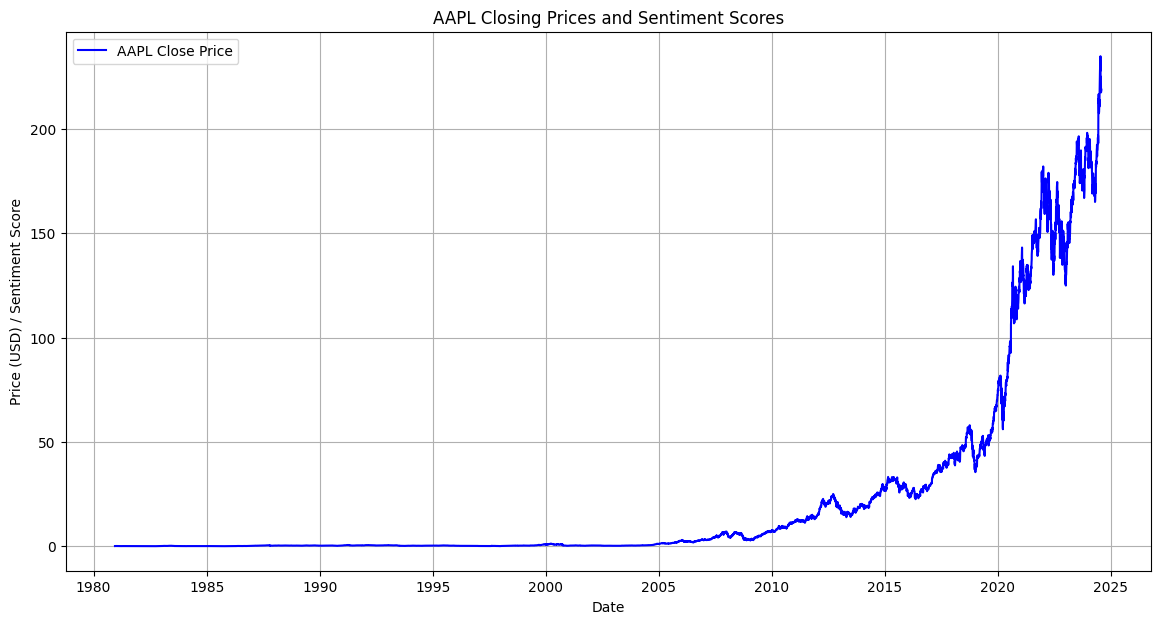

In [22]:
import matplotlib.pyplot as plt

# Example: Plot for AAPL
aapl_data = stock_data['AAPL']

plt.figure(figsize=(14, 7))
plt.plot(aapl_data['Date'], aapl_data['Close'], label='AAPL Close Price', color='blue')
#plt.scatter(aapl_data['Date'], aapl_data['Sentiment'] * 100, label='Sentiment Score', color='orange', alpha=0.5)

plt.title('AAPL Closing Prices and Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Price (USD) / Sentiment Score')
plt.legend()
plt.grid()
plt.show()